# multiclass classification

In [57]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# model definition and compilation

In [35]:

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


# setting aside a validation set

In [36]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# training the model

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.3943 - loss: 3.2405 - val_accuracy: 0.5900 - val_loss: 1.8924
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6494 - loss: 1.6805 - val_accuracy: 0.6880 - val_loss: 1.4054
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7277 - loss: 1.2635 - val_accuracy: 0.7080 - val_loss: 1.2501
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7783 - loss: 1.0240 - val_accuracy: 0.7600 - val_loss: 1.0855
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8286 - loss: 0.8367 - val_accuracy: 0.7830 - val_loss: 1.0111
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8600 - loss: 0.6727 - val_accuracy: 0.7910 - val_loss: 0.9598
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8793 - loss: 0.5851 - val_accuracy: 0.8160 - val_loss: 0.8989
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9017 - loss: 0.4932 - val_accuracy: 0.8200 - 

# plotting results

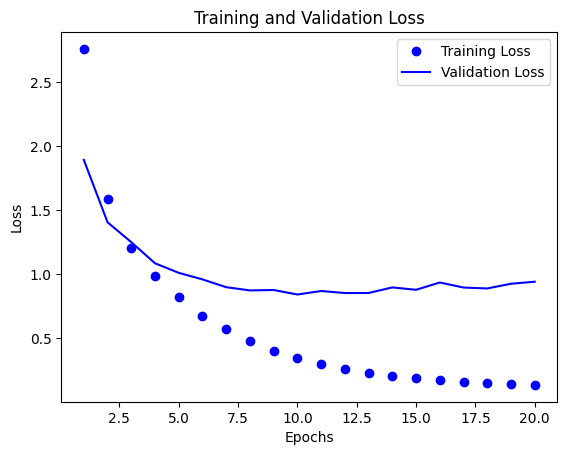

In [39]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

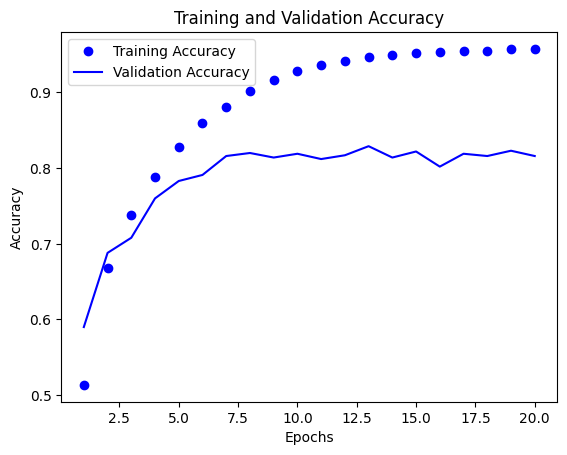

In [40]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# retraining a model

In [59]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0548 - loss: 3.8040
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0505 - loss: 3.6792
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0485 - loss: 3.5410
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.0505 - loss: 3.3679
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.0594 - loss: 3.2079
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0628 - loss: 3.0098
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1649 - loss: 2.7663
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2710 - loss: 2.5289
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2756 - loss: 2.2960
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2618 - loss: 2.2294
[2.256659984588623, 0.2582368552684784]


# predictions on new data

In [51]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


np.int64(3)

# a model with an information bottleneck

In [65]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),     # information bottleneck (4 < 46)
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5062 - loss: 2.4470 - val_accuracy: 0.7050 - val_loss: 1.2829
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7530 - loss: 1.0949 - val_accuracy: 0.7500 - val_loss: 1.1150
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8365 - loss: 0.7283 - val_accuracy: 0.8010 - val_loss: 0.9787
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8922 - loss: 0.4990 - val_accuracy: 0.8060 - val_loss: 0.9081
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9255 - loss: 0.3494 - val_accuracy: 0.7890 - val_loss: 1.0419
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9392 - loss: 0.2666 - val_accuracy: 0.8160 - val_loss: 0.9495
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9506 - loss: 0.2074 - val_accuracy: 0.8060 - val_loss: 1.0191
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9570 - loss: 0.1836 - val_accuracy: 0.7760 - v